<a href="https://colab.research.google.com/github/Nannanpeng/Econ_Dynamic_Programming/blob/master/Uncertainty_trap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import itertools

In [2]:
class UncertaintyTrapEcon:

    def __init__(self,
                a=1.5,          # Risk aversion
                γ_x=0.5,        # Production shock precision
                ρ=0.99,         # Correlation coefficient for θ
                σ_θ=0.5,        # Standard dev of θ shock
                num_firms=100,  # Number of firms
                σ_F=1.5,        # Standard dev of fixed costs
                c=-420,         # External opportunity cost
                μ_init=0,       # Initial value for μ
                γ_init=4,       # Initial value for γ
                θ_init=0):      # Initial value for θ

        # == Record values == #
        self.a, self.γ_x, self.ρ, self.σ_θ = a, γ_x, ρ, σ_θ
        self.num_firms, self.σ_F, self.c, = num_firms, σ_F, c
        self.σ_x = np.sqrt(1/γ_x)

        # == Initialize states == #
        self.γ, self.μ, self.θ = γ_init, μ_init, θ_init

    def ψ(self, F):
        temp1 = -self.a * (self.μ - F)
        temp2 = self.a**2 * (1/self.γ + 1/self.γ_x) / 2
        return (1 / self.a) * (1 - np.exp(temp1 + temp2)) - self.c

    def update_beliefs(self, X, M):
        """
        Update beliefs (μ, γ) based on aggregates X and M.
        """
        # Simplify names
        γ_x, ρ, σ_θ = self.γ_x, self.ρ, self.σ_θ
        # Update μ
        temp1 = ρ * (self.γ * self.μ + M * γ_x * X)
        temp2 = self.γ + M * γ_x
        self.μ = temp1 / temp2
        # Update γ
        self.γ = 1 / (ρ**2 / (self.γ + M * γ_x) + σ_θ**2)

    def update_θ(self, w):
        """
        Update the fundamental state θ given shock w.
        """
        self.θ = self.ρ * self.θ + self.σ_θ * w

    def gen_aggregates(self):
        """
        Generate aggregates based on current beliefs (μ, γ). This
        is a simulation step that depends on the draws for F.
        """
        F_vals = self.σ_F * np.random.randn(self.num_firms)
        M = np.sum(self.ψ(F_vals) > 0)  # Counts number of active firms
        if M > 0:
            x_vals = self.θ + self.σ_x * np.random.randn(M)
            X = x_vals.mean()
        else:
            X = 0
        return X, M

In [3]:
T = 2000
ute = UncertaintyTrapEcon()
thetas = np.zeros(T)
mus = np.zeros(T)
gammas = np.zeros(T)
Ms = np.zeros(T)

for i in range(T):
  X, M = ute.gen_aggregates()
  ute.update_beliefs(X, M)
  w = np.random.randn()
  ute.update_θ(w)
  thetas[i], mus[i], gammas[i], Ms[i] = ute.θ, ute.μ, ute.γ, M 

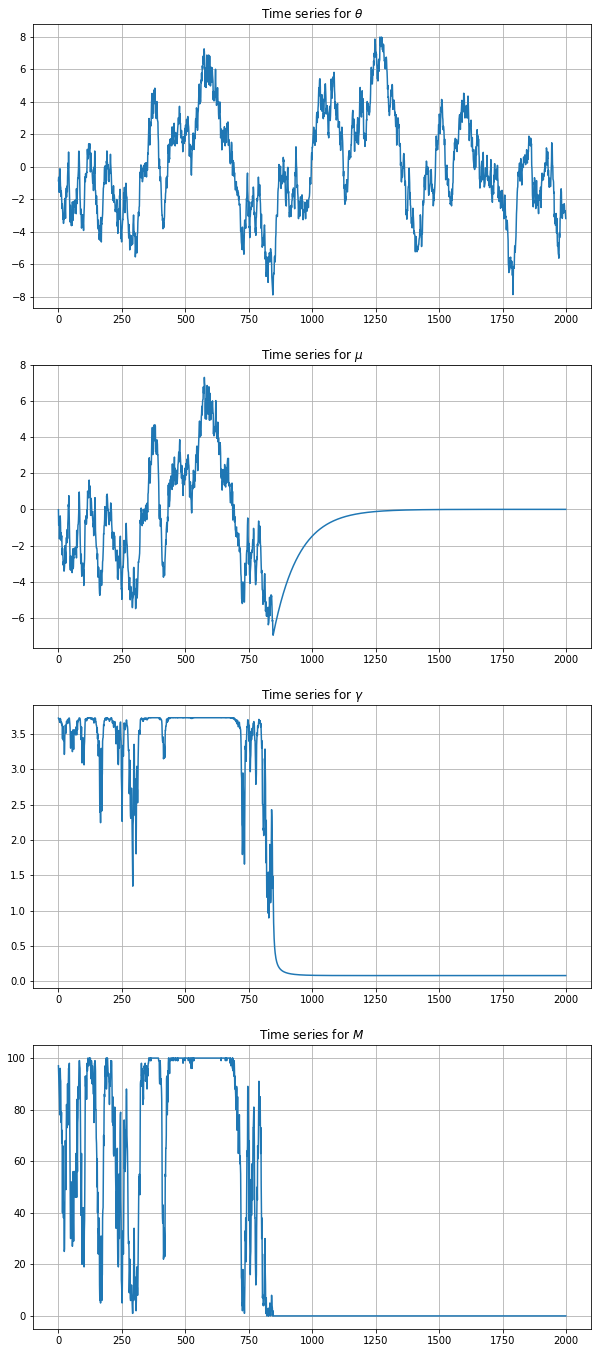

In [4]:
fig, axes = plt.subplots(4, 1, figsize=(10, 24))
for ax, val, title in zip(axes.flatten(), [thetas, mus, gammas, Ms], [r'$\theta$', '$\mu$', '$\gamma$', '$M$']):
  ax.plot(val)
  ax.set(title=f'Time series for {title}')
  ax.grid();